In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("AirPassengers.csv")

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
import matplotlib.pyplot as plt

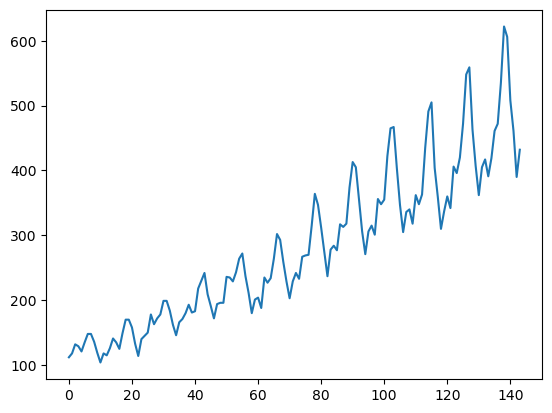

In [6]:
plt.plot(df.iloc[:,1])

Here, we can say that number of passengers is having seasonal variation.

If we are using machine learning model, we have used ARIMA model try to make this model stationary and then apply it.

It is important to note that LSTM are very sensitive to the scaling of an imput data especially when the sigmoid or tanh activation function are used. 

It is always a good practice that we scale the data in the range of 0 to 1 which we also called as normalizing.



In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
df.iloc[:,1]

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64

The scaling operation that we have applied below is to make sure that we apply on the whole data before doing split into train and test dataset so that scaling applies in the proper manner.

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df.iloc[:,1:])

In [11]:
df.shape

(144, 1)

In [15]:
df

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

# Splitting the dataset

Here, we have to make sure that we do not perform any random splitting of train and test dataset because it is kind of time series data. Latest one output is always dependent on the previous outputs.

In [16]:
training_size = int(len(df)*0.65)

In [17]:
training_size

93

In [18]:
test_size = len(df)- training_size

In [19]:
test_size


51

In [20]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [21]:
train_data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [22]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
X_train.shape

(88, 4)

In [25]:
y_train.shape

(88,)

In [26]:
import numpy as np
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [27]:
X_train.shape

(88, 4, 1)

In [28]:
### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
88/88 [==============================] - 4s 14ms/step - loss: 0.0162 - val_loss: 0.0340
Epoch 2/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0061 - val_loss: 0.0291
Epoch 3/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.0283
Epoch 4/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.0418
Epoch 5/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.0259
Epoch 6/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0053 - val_loss: 0.0380
Epoch 7/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0065 - val_loss: 0.0397
Epoch 8/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0059 - val_loss: 0.0235
Epoch 9/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0255
Epoch 10/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0231
Epoch 11

88/88 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0088
Epoch 84/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0076
Epoch 85/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0120
Epoch 86/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0134
Epoch 87/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0167
Epoch 88/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0208
Epoch 89/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0198
Epoch 90/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0149
Epoch 91/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0098
Epoch 92/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0086
Epoch 93/100


In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
#we need to check the performamce which is root mean squared error because we have used mean squared error while training the model.

2/2 [==============================] - 0s 6ms/step


In [31]:
test_predict

array([[0.38315713],
       [0.35636893],
       [0.53424054],
       [0.4010838 ],
       [0.48848155],
       [0.66295457],
       [0.6464499 ],
       [0.61493903],
       [0.4137362 ],
       [0.39018774],
       [0.32345402],
       [0.4728825 ],
       [0.4125259 ],
       [0.3765707 ],
       [0.54016936],
       [0.392951  ],
       [0.5143342 ],
       [0.6866682 ],
       [0.7091456 ],
       [0.6783897 ],
       [0.3147873 ],
       [0.47200182],
       [0.28460947],
       [0.4768624 ],
       [0.46977854],
       [0.40556508],
       [0.6550014 ],
       [0.44104445],
       [0.63841367],
       [0.6980081 ],
       [0.8538123 ],
       [0.6588669 ],
       [0.38780138],
       [0.4884982 ],
       [0.3253841 ],
       [0.6057015 ],
       [0.50654143],
       [0.4734033 ],
       [0.628827  ],
       [0.64569503],
       [0.6102921 ],
       [0.86937624],
       [0.9163662 ],
       [0.5542456 ],
       [0.45391777],
       [0.48327872]], dtype=float32)

In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
test_predict

array([[302.4754 ],
       [288.5991 ],
       [380.7366 ],
       [311.7614 ],
       [357.03345],
       [447.4105 ],
       [438.86108],
       [422.53842],
       [318.31534],
       [306.11725],
       [271.5492 ],
       [348.95316],
       [317.68842],
       [299.06363],
       [383.80774],
       [307.54865],
       [370.42514],
       [459.69415],
       [471.33743],
       [455.40588],
       [267.0598 ],
       [348.49695],
       [251.4277 ],
       [351.0147 ],
       [347.3453 ],
       [314.08273],
       [443.29074],
       [332.46103],
       [434.6983 ],
       [465.5682 ],
       [546.2748 ],
       [445.29306],
       [304.8811 ],
       [357.04208],
       [272.54898],
       [417.7534 ],
       [366.3885 ],
       [349.2229 ],
       [429.7324 ],
       [438.47003],
       [420.13132],
       [554.3369 ],
       [578.6777 ],
       [391.09924],
       [339.1294 ],
       [354.33838]], dtype=float32)

In [34]:
y_train.shape,train_predict.shape,train_predict

((88,),
 (88, 1),
 array([[130.8212  ],
        [125.0644  ],
        [137.40858 ],
        [148.51773 ],
        [148.91927 ],
        [139.45396 ],
        [125.38751 ],
        [112.04489 ],
        [121.51412 ],
        [118.036804],
        [127.40539 ],
        [141.24748 ],
        [136.64267 ],
        [129.36847 ],
        [150.85504 ],
        [169.2698  ],
        [169.23515 ],
        [160.02963 ],
        [138.61508 ],
        [122.5303  ],
        [143.066   ],
        [145.4854  ],
        [150.92354 ],
        [178.70198 ],
        [162.24564 ],
        [175.04663 ],
        [179.69118 ],
        [200.67873 ],
        [197.7799  ],
        [184.22827 ],
        [165.4652  ],
        [152.05527 ],
        [170.3666  ],
        [171.64268 ],
        [181.00136 ],
        [194.14888 ],
        [180.50636 ],
        [186.12595 ],
        [222.25977 ],
        [227.67577 ],
        [242.08499 ],
        [201.52997 ],
        [194.83206 ],
        [175.80367 ],
        [199.6

In [35]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

220.12308696489657

In [36]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

384.97221680360076

Here, both of the values are near to each other but this could have been imporved if we have more data on which LSTM would have been trained on.

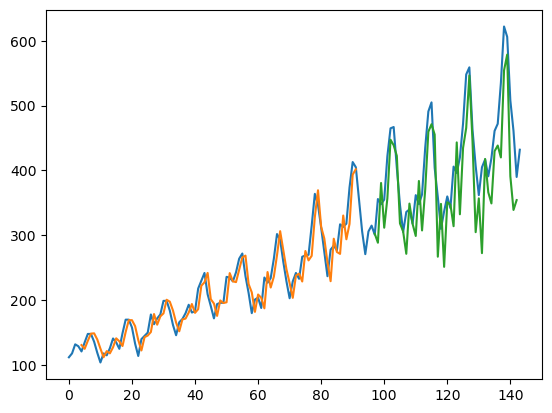

In [41]:
### Plotting 
# shift train predictions for plotting
time_step=4
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict)+time_step, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(time_step*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

green color- model prediction

blue color- training data

orange color- test data

It is worth noting that even with less data, Model was able to capture the seasonal data pattern which impies the capabilities of LSTM.